In [1]:
#data reading
import pandas as pd
import numpy as np

#text cleansing
import re

#libraries for encoding / vectorizing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#Ml model
from sklearn.naive_bayes import MultinomialNB

#checking accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Importing Dataset

In [2]:
#raw data is in csv file named news.csv

df=pd.read_csv('news.csv') 

In [3]:
df.head()

,category,headline,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."


### Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   category           200853 non-null  object
 1   headline           200847 non-null  object
 2   short_description  181141 non-null  object
dtypes: object(3)
memory usage: 4.6+ MB


In [5]:
df.shape

(200853, 3)

In [6]:
#checking data

news_example = df.loc[0]
print(f"""
Headline
{news_example['headline']}

Short Description
{news_example['short_description']}

Category
{news_example['category']}


""")


Headline
There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV

Short Description
She left her husband. He killed their children. Just another day in America.

Category
CRIME





In [7]:
news_example = df.loc[1]
print(f"""
Headline
{news_example['headline']}

Short Description
{news_example['short_description']}

Category
{news_example['category']}


""")


Headline
Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song

Short Description
Of course it has a song.

Category
ENTERTAINMENT





In [8]:
#Checking number of rows for every Category

print(f"""
Category count: {len(df['category'].value_counts())}
{df['category'].value_counts()}
""")


Category count: 41
POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1

In [9]:
%matplotlib inline
import seaborn as sns 
#used for data visualization

sns.set(rc={'figure.figsize':(55,25)})

In [10]:
values = df['category'].value_counts()

Plotting graphs on Topic 

F:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='category'>

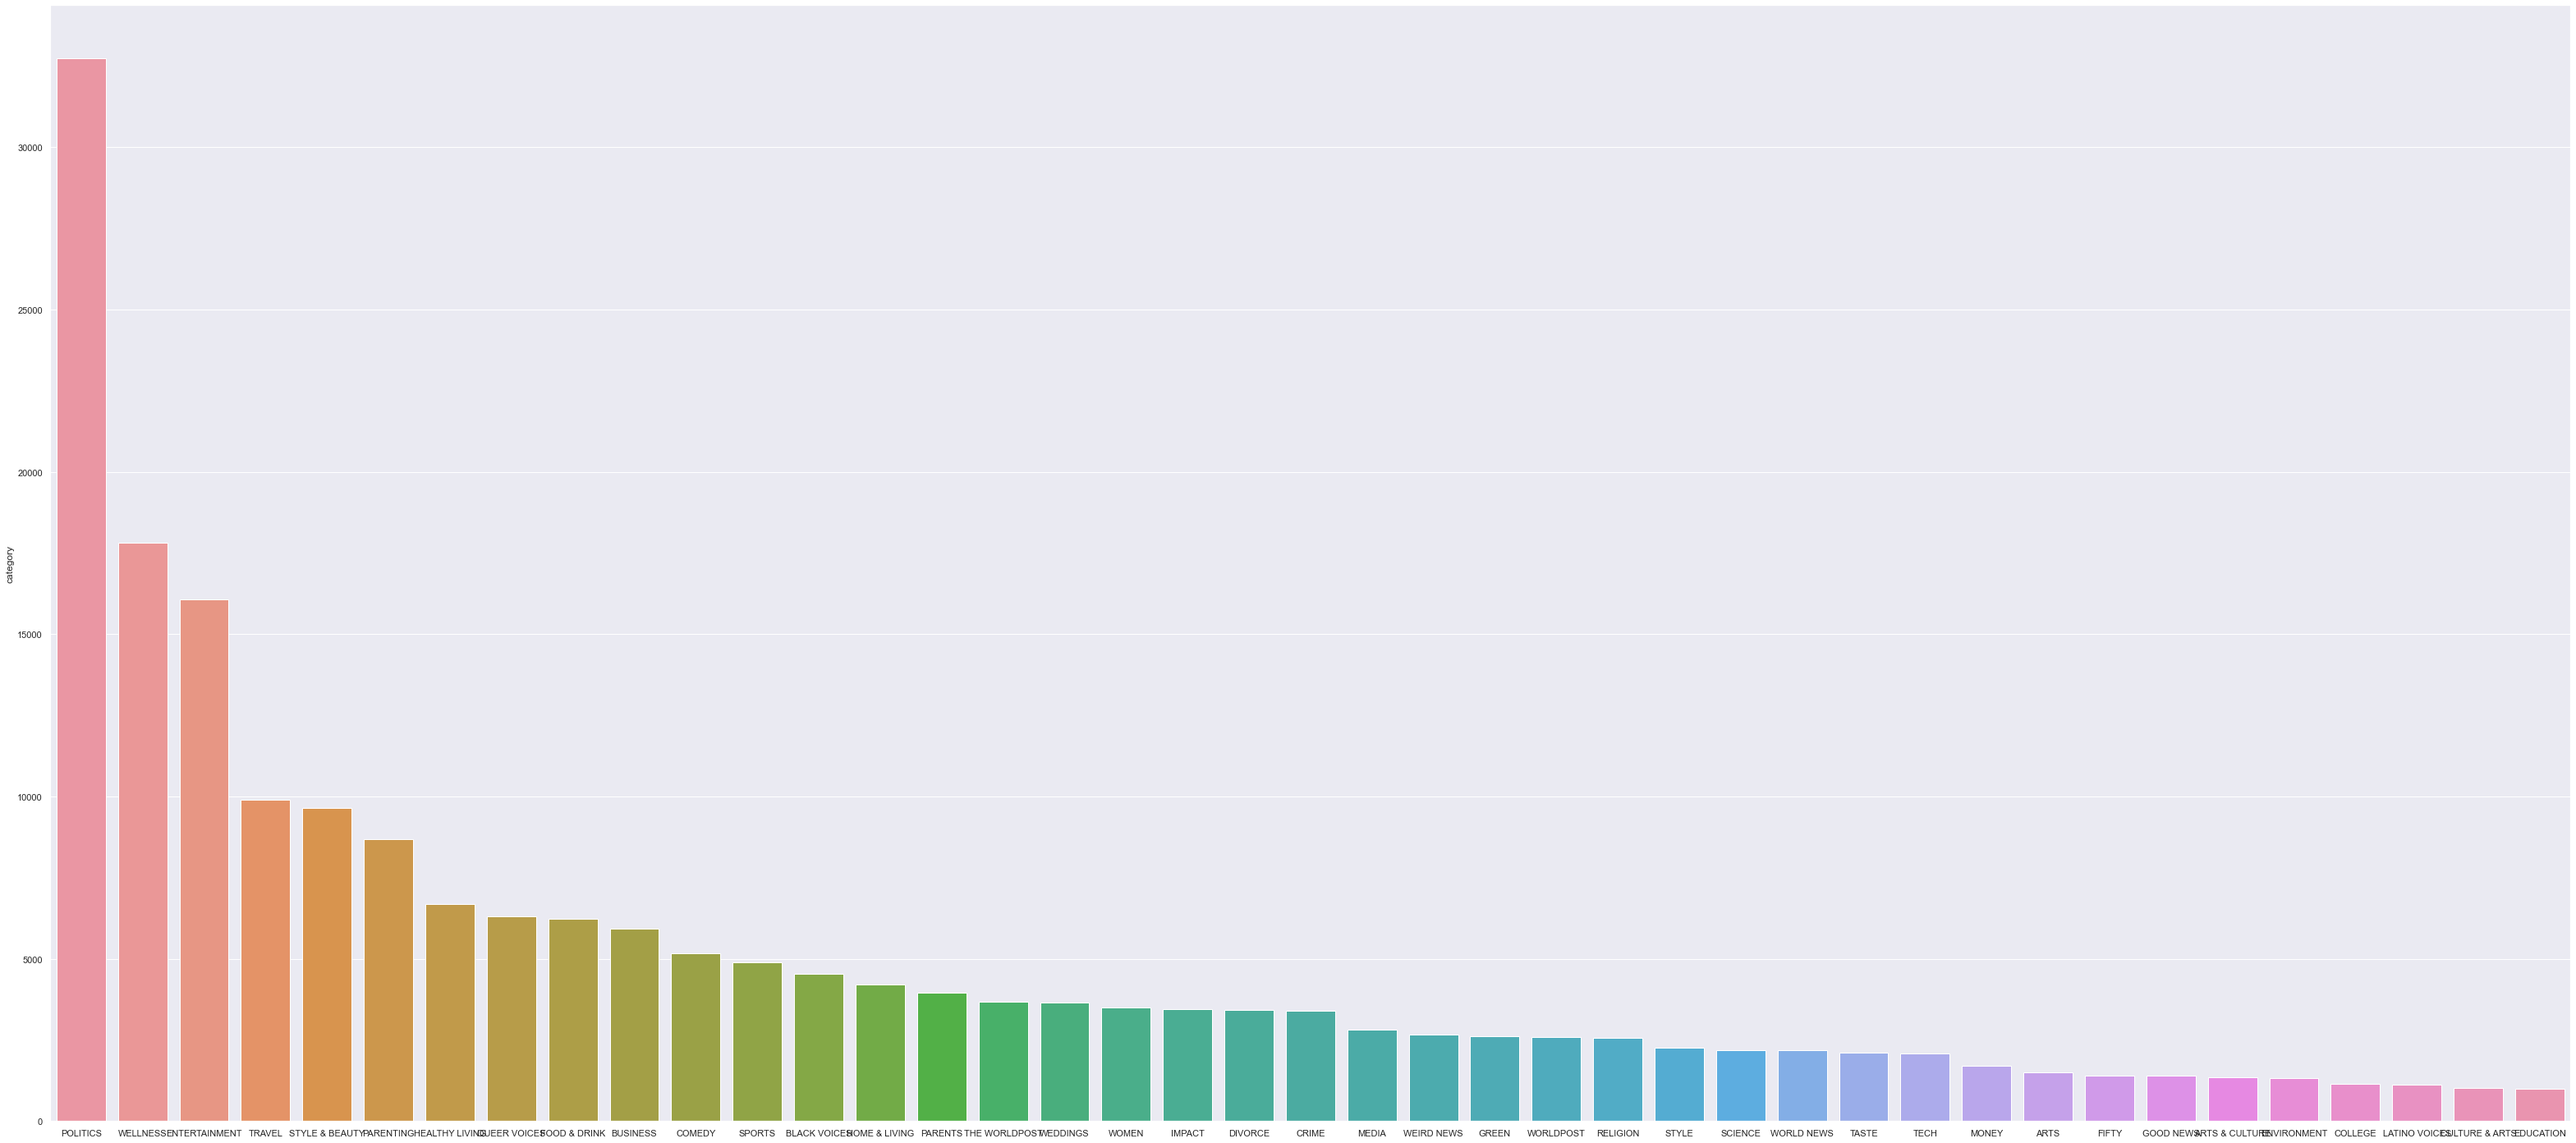

In [11]:
snvalues.index, valuess.barplot()

Plotting Topics with most number of data

F:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='category'>

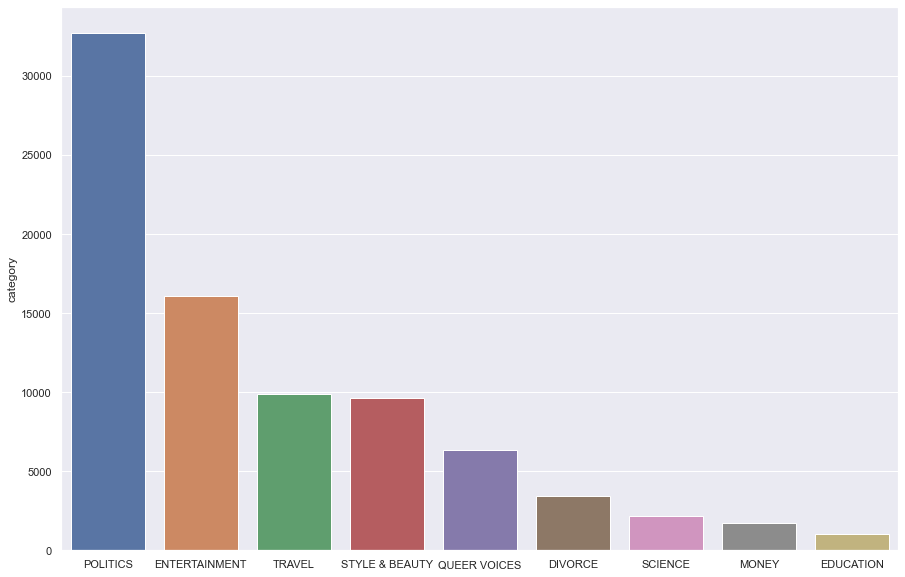

In [12]:
sns.set(rc={'figure.figsize':(15,10)})

values = df['category'].value_counts()[
    ['POLITICS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY', 'QUEER VOICES', 'DIVORCE','SCIENCE', 'MONEY', 'EDUCATION']
]

sns.barplot(values.index, values)

### Data Preprocessing

In [13]:
#printing all unique Categories
mapping = dict(enumerate(df['category'].unique()))
LABEL_MAPPING = {value: key for key, value in mapping.items()}
LABEL_MAPPING

{'CRIME': 0,
 'ENTERTAINMENT': 1,
 'WORLD NEWS': 2,
 'IMPACT': 3,
 'POLITICS': 4,
 'WEIRD NEWS': 5,
 'BLACK VOICES': 6,
 'WOMEN': 7,
 'COMEDY': 8,
 'QUEER VOICES': 9,
 'SPORTS': 10,
 'BUSINESS': 11,
 'TRAVEL': 12,
 'MEDIA': 13,
 'TECH': 14,
 'RELIGION': 15,
 'SCIENCE': 16,
 'LATINO VOICES': 17,
 'EDUCATION': 18,
 'COLLEGE': 19,
 'PARENTS': 20,
 'ARTS & CULTURE': 21,
 'STYLE': 22,
 'GREEN': 23,
 'TASTE': 24,
 'HEALTHY LIVING': 25,
 'THE WORLDPOST': 26,
 'GOOD NEWS': 27,
 'WORLDPOST': 28,
 'FIFTY': 29,
 'ARTS': 30,
 'WELLNESS': 31,
 'PARENTING': 32,
 'HOME & LIVING': 33,
 'STYLE & BEAUTY': 34,
 'DIVORCE': 35,
 'WEDDINGS': 36,
 'FOOD & DRINK': 37,
 'MONEY': 38,
 'ENVIRONMENT': 39,
 'CULTURE & ARTS': 40}

In [14]:
# number of total categories

NUM_CLASSES = len(LABEL_MAPPING) 
print("number of classes:", NUM_CLASSES)

number of classes: 41


In [15]:
# combining similar categories 

df.category[df.category=='THE WORLDPOST'] = 'WORLDPOST'
df.category[df.category=='GREEN'] = 'ENVIRONMENT'
df.category[df.category=='CULTURE & ARTS'] = 'ARTS'
df.category[df.category=='COMEDY'] = 'ENTERTAINMENT'
df.category[df.category=='STYLE'] = 'STYLE & BEAUTY'
df.category[df.category=='ARTS & CULTURE'] = 'ARTS'
df.category[df.category=='COLLEGE'] = 'EDUCATION'
df.category[df.category=='SCIENCE'] = 'TECH'
df.category[df.category=='WEDDINGS'] = 'GOOD NEWS'
df.category[df.category=='TASTE'] = 'FOOD & DRINK'
df.category[(df.category=='PARENTING') | (df.category=='FIFTY')] = 'PARENTS'
df.category[df.category=='WORLD NEWS'] = 'WORLDPOST'

In [16]:
#again checking unique categories

mapping = dict(enumerate(df['category'].unique()))
LABEL_MAPPING = {value: key for key, value in mapping.items()}
LABEL_MAPPING

{'CRIME': 0,
 'ENTERTAINMENT': 1,
 'WORLDPOST': 2,
 'IMPACT': 3,
 'POLITICS': 4,
 'WEIRD NEWS': 5,
 'BLACK VOICES': 6,
 'WOMEN': 7,
 'QUEER VOICES': 8,
 'SPORTS': 9,
 'BUSINESS': 10,
 'TRAVEL': 11,
 'MEDIA': 12,
 'TECH': 13,
 'RELIGION': 14,
 'LATINO VOICES': 15,
 'EDUCATION': 16,
 'PARENTS': 17,
 'ARTS': 18,
 'STYLE & BEAUTY': 19,
 'ENVIRONMENT': 20,
 'FOOD & DRINK': 21,
 'HEALTHY LIVING': 22,
 'GOOD NEWS': 23,
 'WELLNESS': 24,
 'HOME & LIVING': 25,
 'DIVORCE': 26,
 'MONEY': 27}

In [17]:
#count of unique categories

NUM_CLASSES = len(LABEL_MAPPING)
print("number of classes:", NUM_CLASSES)

number of classes: 28


In [18]:
#printing number of rows for every unique category

print(f"""
Category count: {len(df['category'].value_counts())}
{df['category'].value_counts()}
""")


Category count: 28
POLITICS          32739
ENTERTAINMENT     21233
WELLNESS          17827
PARENTS           14033
STYLE & BEAUTY    11903
TRAVEL             9887
WORLDPOST          8420
FOOD & DRINK       8322
HEALTHY LIVING     6694
QUEER VOICES       6314
BUSINESS           5937
GOOD NEWS          5049
SPORTS             4884
BLACK VOICES       4528
TECH               4260
HOME & LIVING      4195
ENVIRONMENT        3945
ARTS               3878
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
RELIGION           2556
EDUCATION          2148
MONEY              1707
LATINO VOICES      1129
Name: category, dtype: int64



Again plotting Bar plots for 28 unique categories

<AxesSubplot:>

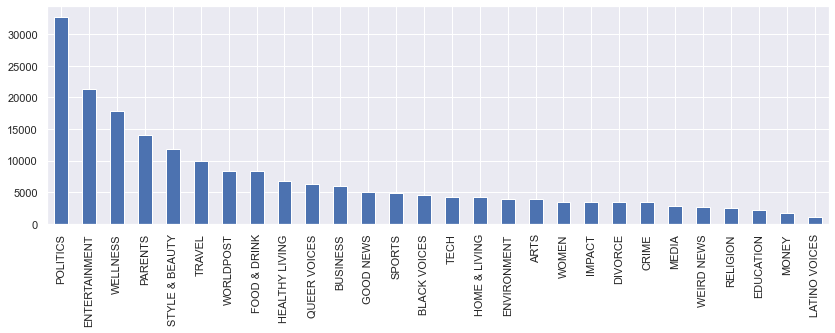

In [19]:
df.category.value_counts().plot.bar(figsize=(14, 4))

In [20]:
df.head()

,category,headline,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."


In [21]:
#merging headline and short_description 
df['description'] = df.headline + ' ' + df.short_description

In [22]:
df.head()

,category,headline,short_description,description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...


In [23]:
#delting columns headline and short_description
df.drop('headline', inplace=True, axis=1)

In [24]:
df.drop('short_description', inplace=True, axis=1)

In [25]:
df

,category,description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...
...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M..."
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...


### Extracting keywords 

extracting keywords from discription column, for prediction of categories

In [27]:
#creating a new column
import numpy as np
df['keywords']=np.nan

In [28]:
df.head()

,category,description,keywords
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,NaN
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,NaN
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...,NaN
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,NaN
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,NaN


In [29]:
import re

In [30]:
#converting all letters to lowercase
df['description'] = df['description'].str.lower()


In [31]:
df.head()

,category,description,keywords
0,CRIME,there were 2 mass shootings in texas last week...,NaN
1,ENTERTAINMENT,will smith joins diplo and nicky jam for the 2...,NaN
2,ENTERTAINMENT,hugh grant marries for the first time at age 5...,NaN
3,ENTERTAINMENT,jim carrey blasts 'castrato' adam schiff and d...,NaN
4,ENTERTAINMENT,julianna margulies uses donald trump poop bags...,NaN


In [32]:
df['category']= df['category'].str.lower()

In [34]:
#importing spacy for keywords extraction

import spacy

In [35]:
#load spacy data for keywords
nlp = spacy.load("en_core_sci_lg")

In [36]:
b=df['description']
c=df['keywords']

In [37]:
%%time  #to check time taken by code
for i in range(len(df)):
    try:
        text=b[i]
    
        c[i]=(nlp(text)).ents
    except TypeError:
        pass

<timed exec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
F:\python\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
F:\python\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
F:\python\lib\site-packages\pandas\core\internals\

Wall time: 3h 22min 29s


In [39]:
df.head()

,category,description,keywords
0,crime,there were 2 mass shootings in texas last week...,"((mass, shootings), (texas), (week), (left), (..."
1,entertainment,will smith joins diplo and nicky jam for the 2...,"((diplo), (nicky, jam), (world, cup, 's), (off..."
2,entertainment,hugh grant marries for the first time at age 5...,"((age), (actor), (longtime, girlfriend, anna, ..."
3,entertainment,jim carrey blasts 'castrato' adam schiff and d...,"((jim, carrey, blasts), (democrats), (artwork)..."
4,entertainment,julianna margulies uses donald trump poop bags...,"((julianna), (margulies), (dog), (actress), (b..."


In [40]:
df.tail()

,category,description,keywords
200848,tech,rim ceo thorsten heins' 'significant' plans fo...,"((rim), (ceo, thorsten, heins, ', ', significa..."
200849,sports,maria sharapova stunned by victoria azarenka i...,"((maria, sharapova), (stunned), (victoria, aza..."
200850,sports,"giants over patriots, jets over colts among m...","((giants), (patriots), (jets), (colts), (super..."
200851,sports,aldon smith arrested: 49ers linebacker busted ...,"((aldon), (arrested), (linebacker, busted, for..."
200852,sports,dwight howard rips teammates after magic loss ...,"((dwight, howard), (rips, teammates), (magic, ..."


now keywords are added to our dataframe, and then for future use convert this DataFrame to csv file

In [41]:
df.to_csv('final_data.csv') #converting df to csv file

In [41]:
df=pd.read_csv('final_data.csv')

In [42]:
df.head()

,category,description,keywords
0,crime,there were 2 mass shootings in texas last week...,"(mass shootings, texas, week, left, husband, k..."
1,entertainment,will smith joins diplo and nicky jam for the 2...,"(diplo, nicky jam, world cup's, official, song..."
2,entertainment,hugh grant marries for the first time at age 5...,"(age, actor, longtime girlfriend anna eberstei..."
3,entertainment,jim carrey blasts 'castrato' adam schiff and d...,"(jim carrey blasts, democrats, artwork, actor,..."
4,entertainment,julianna margulies uses donald trump poop bags...,"(julianna, margulies, dog, actress, bags, cath..."


In [4]:
df.shape

(200853, 3)

In [43]:
print(f"""
Category count: {len(df['category'].value_counts())}
{df['category'].value_counts()}
""")


Category count: 28
politics          32739
entertainment     21233
wellness          17827
parents           14033
style & beauty    11903
travel             9887
worldpost          8420
food & drink       8322
healthy living     6694
queer voices       6314
business           5937
good news          5049
sports             4884
black voices       4528
tech               4260
home & living      4195
environment        3945
arts               3878
women              3490
impact             3459
divorce            3426
crime              3405
media              2815
weird news         2670
religion           2556
education          2148
money              1707
latino voices      1129
Name: category, dtype: int64



In [44]:
#deleting unwanted categories

df.drop(df[df['category'] == 'impact'].index, inplace = True)
df.drop(df[df['category'] == 'weird news'].index, inplace = True)
df.drop(df[df['category'] == 'good news'].index, inplace = True)
df.drop(df[df['category'] == 'wellness'].index, inplace = True)
df.drop(df[df['category'] == 'parents'].index, inplace = True)
df.drop(df[df['category'] == 'queer voices'].index, inplace = True)
df.drop(df[df['category'] == 'media'].index, inplace = True)
df.drop(df[df['category'] == 'latino voices'].index, inplace = True)
df.drop(df[df['category'] == 'divorce'].index, inplace = True)
df.drop(df[df['category'] == 'women'].index, inplace = True)
df.drop(df[df['category'] == 'black voices'].index, inplace = True)
df.drop(df[df['category'] == 'crime'].index, inplace = True)

In [45]:
#merging more categories

df.category[df.category=='style & beauty'] = 'lifestyle'
df.category[df.category=='home & living'] = 'lifestyle'
df.category[df.category=='healthy living'] = 'lifestyle'
df.category[df.category=='money'] = 'business'
df.category[df.category=='worldpost'] = 'international'
df.category[df.category=='education'] = 'tech'
df.category[df.category=='tech'] = 'education/Tech/science'
df.category[df.category=='religion'] = 'arts'
df.category[df.category=='arts'] = 'art/culture'

In [46]:
print(f"""
Category count: {len(df['category'].value_counts())}
{df['category'].value_counts()}
""")


Category count: 11
politics                  32739
lifestyle                 22792
entertainment             21233
travel                     9887
international              8420
food & drink               8322
business                   7644
art/culture                6434
education/Tech/science     6408
sports                     4884
environment                3945
Name: category, dtype: int64



In [47]:
#deleting rows with Null values
df.dropna(inplace=True)

In [48]:
#reseting index numbers
df.reset_index(inplace=True)

In [49]:
#checking remaining categories

mapping = dict(enumerate(df['category'].unique()))
LABEL_MAPPING = {value: key for key, value in mapping.items()}
NUM_CLASSES = len(LABEL_MAPPING)
print(f"""
Category count: {len(df['category'].value_counts())}
{df['category'].value_counts()}
""")


Category count: 11
politics                  29578
lifestyle                 20661
entertainment             17887
travel                     9408
food & drink               8157
international              7081
business                   6783
education/Tech/science     5669
art/culture                5078
sports                     4221
environment                3367
Name: category, dtype: int64



Cleaning rows by removing extra characters from keywords column and adding clean data to plot column

In [50]:
#creating column named plot

df['plot']=np.nan

In [51]:
a=df['keywords']
b=df['plot']

#remove extra characters except alphabets
for i in range(len(a)):
    try:
        b[i]=re.sub('[^A-Za-z]+', ' ', a[i])
    except KeyError:
        pass

<ipython-input-51-a7a8793ea571>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b[i]=re.sub('[^A-Za-z]+', ' ', a[i])
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [52]:
df.dropna(inplace=True)

In [53]:
print(f"""
Category count: {len(df['category'].value_counts())}
{df['category'].value_counts()}
""")


Category count: 11
politics                  29578
lifestyle                 20661
entertainment             17887
travel                     9408
food & drink               8157
international              7081
business                   6783
education/Tech/science     5669
art/culture                5078
sports                     4221
environment                3367
Name: category, dtype: int64



In [54]:
df.head()

,index,category,description,keywords,plot
0,1,entertainment,will smith joins diplo and nicky jam for the 2...,"(diplo, nicky jam, world cup's, official, song...",diplo nicky jam world cup s official song cou...
1,2,entertainment,hugh grant marries for the first time at age 5...,"(age, actor, longtime girlfriend anna eberstei...",age actor longtime girlfriend anna eberstein ...
2,3,entertainment,jim carrey blasts 'castrato' adam schiff and d...,"(jim carrey blasts, democrats, artwork, actor,...",jim carrey blasts democrats artwork actor dem...
3,4,entertainment,julianna margulies uses donald trump poop bags...,"(julianna, margulies, dog, actress, bags, cath...",julianna margulies dog actress bags cathartic...
4,5,entertainment,morgan freeman 'devastated' that sexual harass...,"(morgan freeman ', devastated, sexual harassme...",morgan freeman devastated sexual harassment c...


getting equal rows for all categories for uniformityin data i.e. getting 3367 rows on each category

In [55]:
dfs = []

# loop through each category and get 3367 rows and append to dfs
for category in df['category'].unique():
    temp = df[df['category']==category]
    dfs.append(temp.sample(3367))
    
# concatenate dataframes
df = pd.concat(dfs)

# shuffle dataframe
df = df.sample(frac=1).reset_index(drop=True)

# first few rows
df.head()

,index,category,description,keywords,plot
0,12927,food & drink,google's cheeseburger emoji has one major flaw...,"(google's cheeseburger, emoji, heathens)",google s cheeseburger emoji heathens
1,81629,international,why the debate over europe's migration crisis ...,"(europe's migration, crisis, myths, interview,...",europe s migration crisis myths interview mig...
2,194321,lifestyle,fashionably late: style news you might have mi...,"(style, news, week, photos, late, style scraps...",style news week photos late style scraps week...
3,163744,environment,tipping points: can humanity break the planet?...,"(tipping points, humanity, planet, warnings, l...",tipping points humanity planet warnings local...
4,85926,art/culture,pope francis' mass in paraguay is like a makes...,"(francis' mass, paraguay, makeshift, homecomin...",francis mass paraguay makeshift homecoming yo...


In [56]:
mapping = dict(enumerate(df['category'].unique()))
LABEL_MAPPING = {value: key for key, value in mapping.items()}
NUM_CLASSES = len(LABEL_MAPPING)
print(f"""
Category count: {len(df['category'].value_counts())}
{df['category'].value_counts()}
""")


Category count: 11
lifestyle                 3367
international             3367
travel                    3367
education/Tech/science    3367
environment               3367
sports                    3367
politics                  3367
business                  3367
entertainment             3367
food & drink              3367
art/culture               3367
Name: category, dtype: int64



In [57]:
#deleting unwanted rows
df.drop(['index','description','keywords'],axis=1, inplace=True)

In [58]:
df.head()

,category,plot
0,food & drink,google s cheeseburger emoji heathens
1,international,europe s migration crisis myths interview mig...
2,lifestyle,style news week photos late style scraps week...
3,environment,tipping points humanity planet warnings local...
4,art/culture,francis mass paraguay makeshift homecoming yo...


### Encoding category column

In [59]:
le = LabelEncoder()
  
df['encoded_category']= le.fit_transform(df['category'])


In [60]:
#printing Encoded values corresponding to categories

a=df['category'].unique()
b=df['category']
c=df['encoded_category']
list1=[]
for i in a:
    for j in range(len(b)):
        if b[j]==i:
            list1.append(j)
            break


for i in list1:
    print(f"{b[i]} : {c[i]}")

food & drink : 5
international : 6
lifestyle : 7
environment : 4
art/culture : 0
entertainment : 3
politics : 8
education/Tech/science : 2
business : 1
sports : 9
travel : 10


In [61]:
df.head()

,category,plot,encoded_category
0,food & drink,google s cheeseburger emoji heathens,5
1,international,europe s migration crisis myths interview mig...,6
2,lifestyle,style news week photos late style scraps week...,7
3,environment,tipping points humanity planet warnings local...,4
4,art/culture,francis mass paraguay makeshift homecoming yo...,0


### Vectorizing plot column

In [62]:
tfidf = TfidfVectorizer()
feature= tfidf.fit_transform(df['plot']).toarray()

### Creating X ,y variables 

In [63]:
X=feature
y=df['encoded_category']

###  Train Test split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

### Fitting Naive_Bayes

In [65]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

### Predict Values

In [66]:
y_pred=clf.predict(X_test)

### Calculating Model Accuracy 

In [67]:
#calculating accuracy

accuracy_score(y_test,y_pred)

0.7095032397408207

In [68]:
#creating confusion metrics

confusion_matrix(y_test, y_pred)

array([[526,  22,  36,  48,  23,   8,  48,  26,  53,  10,  37],
       [ 17, 576,  58,  14,  33,  34,  24,  25,  48,  15,  25],
       [ 18,  81, 498,  19,  70,  17,  24,  22,  41,  30,  25],
       [ 43,  19,  21, 522,  18,  17,  11,  50,  56,  48,  17],
       [  9,  27,  24,  10, 631,  19,  14,  11,  25,   7,  33],
       [  7,  14,   4,  16,  10, 703,   6,  19,   2,   8,  26],
       [ 28,  24,  21,   7,  34,   1, 691,   5,  32,   9,  14],
       [ 32,  50,  40,  40,  42,  43,  21, 531,  27,  13,  39],
       [ 19,  45,  24,  23,  49,   4,  91,   5, 545,  16,  11],
       [  6,   5,  20,  28,   9,   3,  24,   5,  23, 704,   9],
       [ 19,  21,  15,  16,  42,  43,  19,  19,   4,   9, 643]],
      dtype=int64)

In [69]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.63      0.67       837
           1       0.65      0.66      0.66       869
           2       0.65      0.59      0.62       845
           3       0.70      0.64      0.67       822
           4       0.66      0.78      0.71       810
           5       0.79      0.86      0.82       815
           6       0.71      0.80      0.75       866
           7       0.74      0.60      0.67       878
           8       0.64      0.66      0.65       832
           9       0.81      0.84      0.83       836
          10       0.73      0.76      0.74       850

    accuracy                           0.71      9260
   macro avg       0.71      0.71      0.71      9260
weighted avg       0.71      0.71      0.71      9260

